<a href="https://colab.research.google.com/github/Rupasri20055/Project-Fraud-Detection-in-Credit-Card-Transactions/blob/main/Fraud_Detection_in_Credit_Card_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


**Load Dataset**

In [2]:
# Load credit card fraud detection dataset
data = pd.read_csv("creditcard.csv")

# Display dataset shape and first 5 records
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Check for Missing Values**

In [3]:
# Check for null/missing values in the dataset
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Drop any rows with null values (if any)**

In [4]:
# Drop rows containing any NaN values (if found)
data.dropna(inplace=True)

# Check again to confirm no missing values
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Class Distribution Count**

In [5]:
# Count of Fraud vs Non-Fraud transactions
print(data['Class'].value_counts())


Class
0    284315
1       492
Name: count, dtype: int64


**Class Distribution Plot (Countplot)**

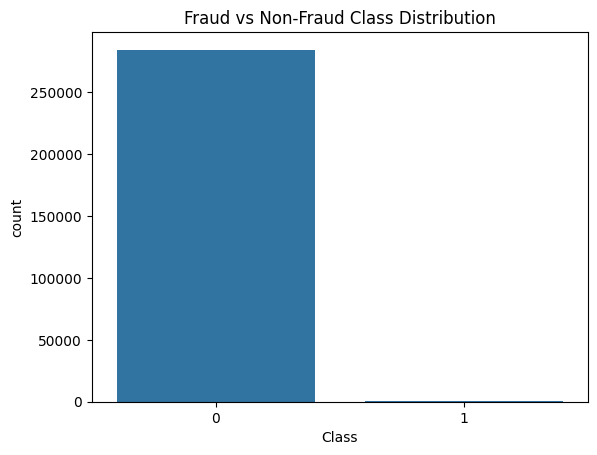

In [6]:
# Visualize Fraud vs Non-Fraud counts
sns.countplot(x='Class', data=data)
plt.title('Fraud vs Non-Fraud Class Distribution')
plt.show()


**Class Distribution Pie Chart**

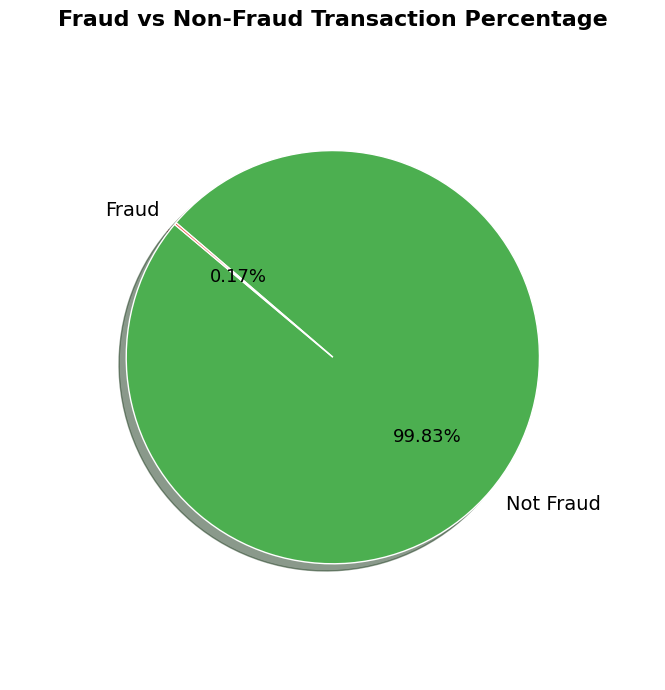

In [7]:
# Pie chart for class percentage
fraud_counts = data['Class'].value_counts()
labels = ['Not Fraud', 'Fraud']
colors = ['#4CAF50', '#F44336']

# Create figure
fig, ax = plt.subplots(figsize=(7,7))

# Plot pie chart with smaller radius
wedges, texts, autotexts = ax.pie(
    fraud_counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    textprops={'color':"black", 'fontsize': 13},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    shadow=True,
    radius=0.8
)

# Set font size for labels
for text in texts:
    text.set_fontsize(14)

# Set font size for percentages
for autotext in autotexts:
    autotext.set_fontsize(13)

# Add a neat title
plt.title('Fraud vs Non-Fraud Transaction Percentage', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



**Bar Chart for Class Distribution (Count Plot)**

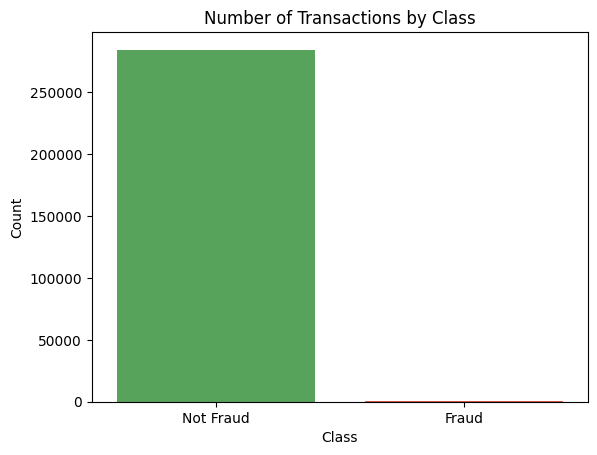

In [16]:
#  Bar chart for class distribution
sns.barplot(x=data['Class'].value_counts().index, y=data['Class'].value_counts().values, palette=['#4CAF50','#F44336'])
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.title('Number of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


**Correlation Heatmap**

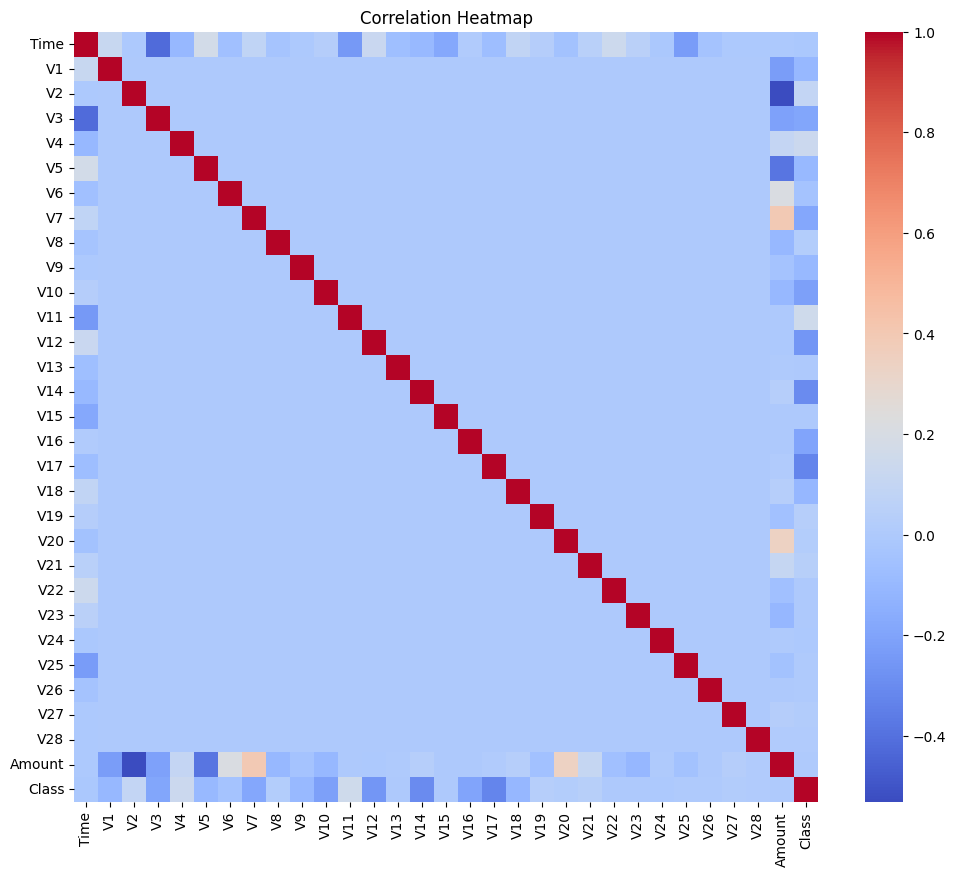

In [8]:
# Visualize correlation between all features
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Transaction Amount Distribution Plot**

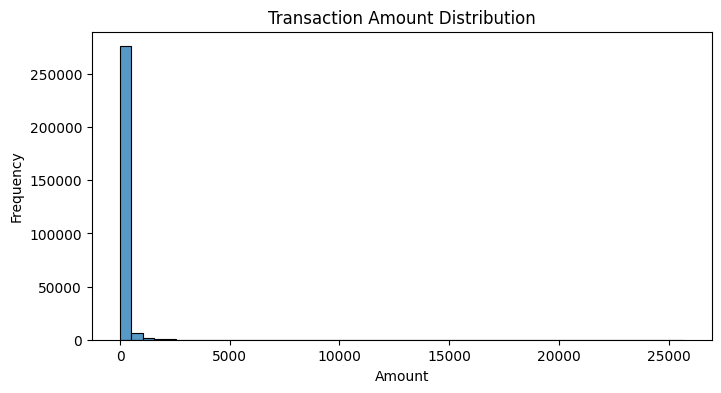

In [9]:
# Distribution of transaction amounts
plt.figure(figsize=(8,4))
sns.histplot(data['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


**Standardize ‘Amount’ and ‘Time’ Features**

In [10]:
# Standard scaling for Amount and Time
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1,1))


**Drop Original ‘Amount’ and ‘Time’ Columns**

In [11]:
# Remove original Amount and Time columns
data.drop(['Time','Amount'], axis=1, inplace=True)


**Split Features and Target**

In [12]:
# Split dataset into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

**Confirm No Nulls in Target Variable**

In [13]:
# Check if target variable has any null values
print("Null values in target y:", y.isnull().sum())

Null values in target y: 0


**Train-Test Split**

In [14]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

**Check Class Balance in Train Set**

In [15]:
# Check class distribution in the training set
print("Class Distribution in Training Set:\n", y_train.value_counts())


Class Distribution in Training Set:
 Class
0    227451
1       394
Name: count, dtype: int64
